In [1]:
import warnings
warnings.filterwarnings(action='ignore')
%config Completer.use_jedi = False

비지도 학습(Unsupervised Learning)  
지도 학습(Supervised Learning)에서는 라벨링된 데이터(타겟)를 이용해서 모델을 생성한다. 주어진 데이터셋에 라벨링이 되어있다면 학습 및 분류를 시키기 좋지만 실제 데이터를 다루다 보면 라벨링이 되어 있지 않은 경우도 많이 접한다. 비지도 학습은 라벨링이 되어 있지 않은 데이터를 이용하는 학습 방법이다.

비지도 학습에 사용하는 데이터는 라벨링이 되어 있지 않으므로 타겟 데이터 없이 피쳐 데이터만을 활용해서 데이터를 학습시킨다. 지도 학습에서는 데이터를 분류하는 것을 classification라고 했지만, 비지도 학습에서는 데이터를 분류하는 것을 clustering이라고 한다.

k평균 클러스터링(kmeans clustering)  
k평균 클러스터링은 n개의 데이터를 k개의 클러스터로 나누는 클러스터링 기법이다. k평균 클러스터링은 각 데이터 포인트와 각 그룹 평균(중심) 간의 거리를 구한 후 가장 가까운 클러스터로 배정하는 방법이다.

k평균 클러스터링에서는 거리라는 개념이 사용된다. 여기서는 유클리드 거리(Euclidean Distance)를 사용한다. 데이터 포인트 x와 데이터 포인트 y 사이의 유클리드 거리는 아래와 같은 공식을 사용한다.

$$d(x, y) = \sqrt {\sum (x_i - y_i)^2}$$

k평균 클러스터링 알고리즘  
① 그룹 평균 초기화  
&nbsp;&nbsp;&nbsp;k평균 클러스터링 알고리즘의 첫 과정은 각 그룹의 평균을 초기화하는 것인데, 이때 사용하는 가장 기본적인 방법은 랜덤으로 평균을 설정하는 것이다.  
② 그룹 할당  
&nbsp;&nbsp;&nbsp;각 데이터 포인트와 가장 가까운 그룹 평균에 해당되는 그룹에 할당한다. 즉, 각 데이터 포인트와 각 그룹의 평균까지의 거리를 계산해서 가장 가까운 그룹으로 속하게 만드는 것이다.  
③ 평균 업데이트  
&nbsp;&nbsp;&nbsp;위 단계를 거치면 모든 데이터 포인트가 어떤 그룹에 속하는지 알 수 있다. 그 후 각 그룹에 대한 새로은 평균값을 구한다.  
④ 반복  
&nbsp;&nbsp;&nbsp;② 단계에서 바뀌는게 없을 때 까지 ②, ③ 단계를 반복한다.

k평균 클러스터링은 사용하기 쉽다는 장점이 있자만 k평균 클러스터링에서는 가중치를 주지 않아 클러스터간 데이터의 밀도 차이가 있을 경우 클러스터링이 잘되지 않는 단점이 있다. 그리고 k평균 클러스터링은 모양을 고려하지 않어며, 초기 k값을 사용자가 정해야 한다는 단점이 존재한다.

k평균 클러스터링 알고리즘을 활용해 주어진 데이터를 클러스터링 해본다.

In [2]:
# 데이터 불러오기
from sklearn import datasets # 사이킷런이 제공하는 데이터셋을 사용하기 위해 import 한다.
# make_blobs() 메소드를 실행해서 등방성 가우시안 정규 분포를 이용해서 가상 데이터를 생성한다.
# 등방성이라는 말은 모든 방향을 같은 성질을 가진다는 뜻이다.
# n_samples 속성으로 표본 데이터의 개수(100이 기본값)를 지정하고 n_features 속성으로 피쳐의 개수(2가 기본값),
# centers 속성으로 클러스터의 개수(3이 기본값)를 설정해서 클러스터링용 가상 데이터를 만든다.
X, y = datasets.make_blobs(n_samples=100, n_features=2, centers=6, random_state=10)
print(X.shape, y.shape)

(100, 2) (100,)


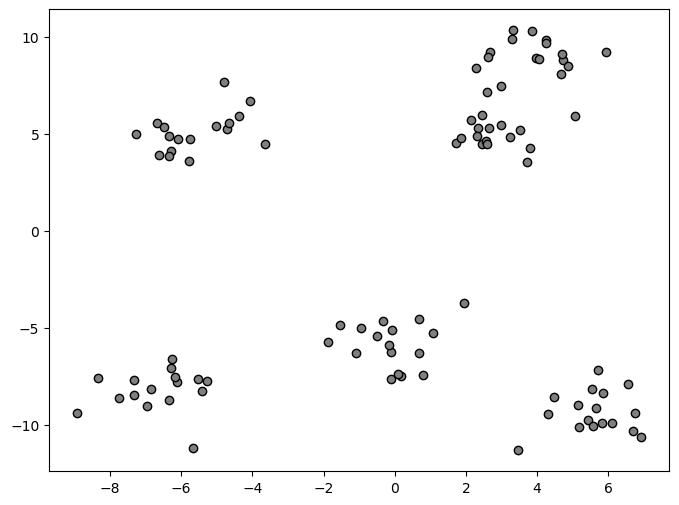

In [3]:
# 라벨링되지 않은 데이터 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=[8, 6])
plt.scatter(X[:, 0], X[:, 1], c='gray', edgecolors='black', marker='o')
plt.show()

In [4]:
# k평균 클러스터링 모델 생성 후 데이터 학습
from sklearn.cluster import KMeans # k평균 클러스터링에 사용하기 위해 import 한다.
# n_clusters 속성으로 클러스터링하려는 집단의 개수를 지정한다. 기본값은 8이다.
# init 속성에 random으로 지정하면 첫 번째 평균(중심)값을 랜덤하게 결정한다. 기본값은 k-means++이다.
# max_iter 속성으로 군집화를 실행하는 최대 반복 횟수를 지정한다. 기본값은 300이다.
kmc = KMeans(n_clusters=5, init='random', max_iter=100, random_state=0) # k평균 클러스터링 모델을 만든다.
kmc.fit(X) # 피쳐 데이터 X를 모델에 넣어서 k평균 클러스터링 알고리즘을 학습시킨다.

KMeans(init='random', max_iter=100, n_clusters=5, random_state=0)

In [5]:
# 클러스터링 결과(레이블)를 확인한다.
label_kmc = kmc.labels_
print(label_kmc)

[2 3 4 4 0 4 1 1 0 2 3 4 0 2 0 4 3 1 0 1 1 4 2 4 4 4 2 3 0 1 1 2 2 0 2 2 3
 3 2 3 1 1 3 1 0 3 3 2 0 3 0 3 0 2 3 0 0 2 3 1 4 3 3 1 2 4 3 3 3 0 3 3 4 1
 0 4 2 2 3 1 2 4 4 0 0 3 1 3 3 1 3 1 3 3 3 4 3 3 3 3]


클러스터링된 데이터 시각화

In [6]:
import pandas as pd
kmc_columns = ['kmc_comp1', 'kmc_comp2']
X_kmc_df = pd.DataFrame(X, columns=kmc_columns)
X_kmc_df['target'] = y
X_kmc_df['label_kmc'] = label_kmc # 데이터프레임에 클러스터링된 라벨을 결합한다.
X_kmc_df

,kmc_comp1,kmc_comp2,target,label_kmc
0,-6.086784,4.729827,3,2
1,3.801750,4.278268,1,3
2,-7.330583,-8.494063,4,4
3,-6.107069,-7.818906,4,4
4,5.525562,-8.186965,0,0
...,...,...,...,...
95,-6.950884,-9.024594,4,4
96,2.591843,4.446782,1,3
97,2.992321,5.436981,1,3
98,2.310466,4.854172,1,3


In [7]:
# 타겟 클래스와 클러스터링 라벨의 종류 확인
print(set(X_kmc_df.target), set(X_kmc_df.label_kmc))

{0, 1, 2, 3, 4, 5} {0, 1, 2, 3, 4}


실제 타겟 데이터 시각화

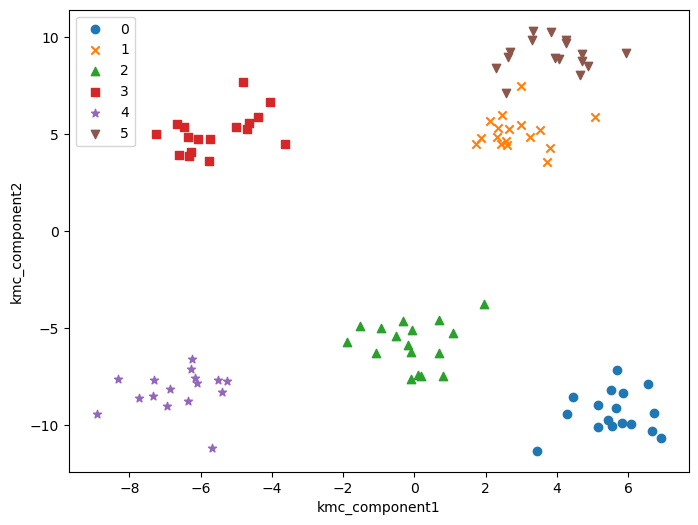

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=[8, 6])
markers = ['o', 'x', '^', 's', '*', 'v']

for index, marker in enumerate(markers):
    df_index = X_kmc_df[X_kmc_df.target == index]
    target_index = index
    X1 = df_index.kmc_comp1
    X2 = df_index.kmc_comp2
    plt.scatter(X1, X2, marker=marker, label=target_index)

plt.xlabel('kmc_component1')
plt.ylabel('kmc_component2')
plt.legend()
plt.show()

k평균 클러스터링 적용 데이터 시각화

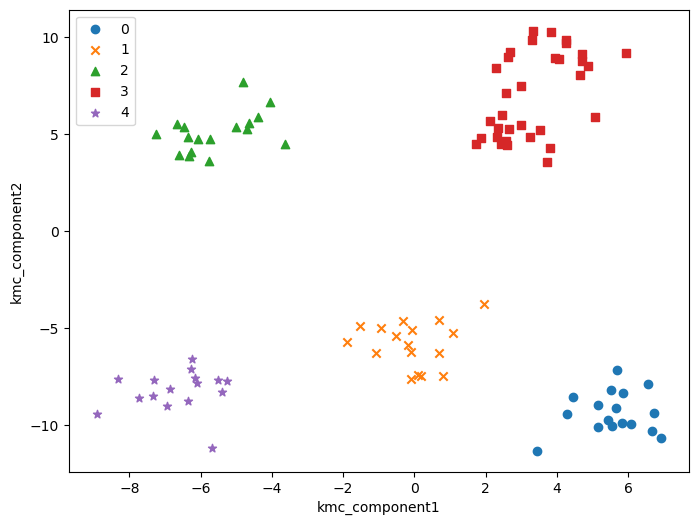

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=[8, 6])
markers = ['o', 'x', '^', 's', '*']

for index, marker in enumerate(markers):
    df_index = X_kmc_df[X_kmc_df.label_kmc == index]
    target_index = index
    X1 = df_index.kmc_comp1
    X2 = df_index.kmc_comp2
    plt.scatter(X1, X2, marker=marker, label=target_index)

plt.xlabel('kmc_component1')
plt.ylabel('kmc_component2')
plt.legend()
plt.show()

In [12]:
# 군집 문제에서의 모델 성능 평가, 군집 모델은 비지도 학습을 이용해 생성한 모델을 의미한다.
# 실루엣 스코어(silhouette score)를 사용해 군집 모델을 평가한다.
# 실루엣 스코어는 서로 다른 군집이 얼마나 잘 분리되어 있는지를 나타내는 지표이다.
from sklearn.metrics import silhouette_score # 실루엣 스코어 알고리즘을 사용하기 위해 import 한다.
# silhouette_score() 메소드에 피처 데이터(X)와 군집화 결과로 얻은 레이블(label_kmc)을 넘겨 실루엣 스코어를 평가한다.
sil_score = silhouette_score(X, label_kmc)
print(sil_score)
# 실루엣 스코어는 -1부터 1사이의 값을 가지며 점수가 높을수록 좋은 성능을 의미한다.

0.7209801012404234
